In [192]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statistics
import random

In [193]:
# загрузим и посмотрим на имеющиеся данные
data_raw = pd.read_csv('BankChurners.csv')
data_raw

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [194]:
# удалим 2 последних столбца

# cписок с названием столбцов для удаления:
drop_columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

data_raw.drop(drop_columns, axis = 1, inplace = True, errors = 'ignore') 
#axis - 1-удаляем столдбец, 0-строку; inplace - изменяется исходный датафрейм; errors - если в метках для удаления есть название, отсутствующее в датафрейме, оно игнорируется.

data_raw

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [195]:
# выгрузим краткое описание представленных данных
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [196]:
# переименуем некоторые столбцы для лучшего понимания их содержания
new_data = data_raw.rename(columns = {"CLIENTNUM": "CLIENT",
                                      "Attrition_Flag": "Client_activity",
                                      "Total_Relationship_Count": "Qty_of_products", 
                                      "Months_Inactive_12_mon": "Inactive_months",
                                      "Contacts_Count_12_mon": "Qty_of_contacts",
                                      "Total_Revolving_Bal": "Revolving_Balance",
                                      "Avg_Open_To_Buy": "Buy_Credit_Line",
                                      "Total_Amt_Chng_Q4_Q1": "Change_in_Transaction_Amount",
                                      "Total_Trans_Amt": "Transaction_Amount",
                                      "Total_Trans_Ct": "Transaction_Count",
                                      "Total_Ct_Chng_Q4_Q1": "Change_in_Transaction_Count",
                                      "Total_Trans_Ct": "Transaction_Count"})
new_data

,CLIENT,Client_activity,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Inactive_months,Qty_of_contacts,Credit_Limit,Revolving_Balance,Buy_Credit_Line,Change_in_Transaction_Amount,Transaction_Amount,Transaction_Count,Change_in_Transaction_Count,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [197]:
# статистические характеристики столбцов
new_data.describe(include='all')

,CLIENT,Client_activity,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Inactive_months,Qty_of_contacts,Credit_Limit,Revolving_Balance,Buy_Credit_Line,Change_in_Transaction_Amount,Transaction_Amount,Transaction_Count,Change_in_Transaction_Count,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [198]:
# для построения «полной» матрицы корреляции данные с типом object необходимо преобразовать в числовой тип
# отдельно рассмотрим содержание столбцов с номинальным типом данных (object)

print(new_data['Client_activity'].value_counts(),
      new_data['Gender'].value_counts(), 
      new_data['Education_Level'].value_counts(),
      new_data['Marital_Status'].value_counts(),
      new_data['Income_Category'].value_counts(),
      new_data['Card_Category'].value_counts(), sep='\n')

Existing Customer    8500
Attrited Customer    1627
Name: Client_activity, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [199]:
# выведем столбцы только с номинальным типом данных (object)
object_new_data = new_data.select_dtypes(include='object')
object_new_data 

,Client_activity,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [200]:
# создадим словарь для функции replace с целью замены значений с типом данных object на числовые значения

dict_replace={} #пустой словарь
dict_unique={}

for name in object_new_data: # ходим циклом по названиям столбцов в датафрейме object_new_data
    unique = list(object_new_data[name].unique()) #выделяем в столбцах уникальные значения
    i=0 #счетчик для присвоения уникальным значениям в столбце числового значения
    for element in unique: #ходим циклом по уникальным значениям
        dict_unique[element]=i #создаем справочник для уникальных значений с соответствующим числовым значением
        i+=1 #увеличиваем счетчик на 1
    dict_replace[name]=dict_unique #добавляем в словарь по названию столбца уникальные значения со счетчиком  
    dict_unique={} #очищаем справочник для заполнения значениями по следующему столбцу
print(dict_replace)

{'Client_activity': {'Existing Customer': 0, 'Attrited Customer': 1}, 'Gender': {'M': 0, 'F': 1}, 'Education_Level': {'High School': 0, 'Graduate': 1, 'Uneducated': 2, 'Unknown': 3, 'College': 4, 'Post-Graduate': 5, 'Doctorate': 6}, 'Marital_Status': {'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3}, 'Income_Category': {'$60K - $80K': 0, 'Less than $40K': 1, '$80K - $120K': 2, '$40K - $60K': 3, '$120K +': 4, 'Unknown': 5}, 'Card_Category': {'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3}}


In [201]:
# замена значений в изначальном датафрейм при помощи функции replace и созданного словаря dict_replace
new_data2 = new_data.replace(dict_replace)
new_data2

,CLIENT,Client_activity,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Inactive_months,Qty_of_contacts,Credit_Limit,Revolving_Balance,Buy_Credit_Line,Change_in_Transaction_Amount,Transaction_Amount,Transaction_Count,Change_in_Transaction_Count,Avg_Utilization_Ratio
0,768805383,0,45,0,3,0,0,0,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,1,1,1,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,1,0,2,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,0,2,1,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,2,0,0,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,0,2,1,1,3,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,0,2,3,3,3,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,1,1,0,0,1,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,0,2,1,2,3,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [202]:
# результат замены
new_data2.dtypes

CLIENT                            int64
Client_activity                   int64
Customer_Age                      int64
Gender                            int64
Dependent_count                   int64
Education_Level                   int64
Marital_Status                    int64
Income_Category                   int64
Card_Category                     int64
Months_on_book                    int64
Qty_of_products                   int64
Inactive_months                   int64
Qty_of_contacts                   int64
Credit_Limit                    float64
Revolving_Balance                 int64
Buy_Credit_Line                 float64
Change_in_Transaction_Amount    float64
Transaction_Amount                int64
Transaction_Count                 int64
Change_in_Transaction_Count     float64
Avg_Utilization_Ratio           float64
dtype: object

# Матрица корреляции

<Axes: >

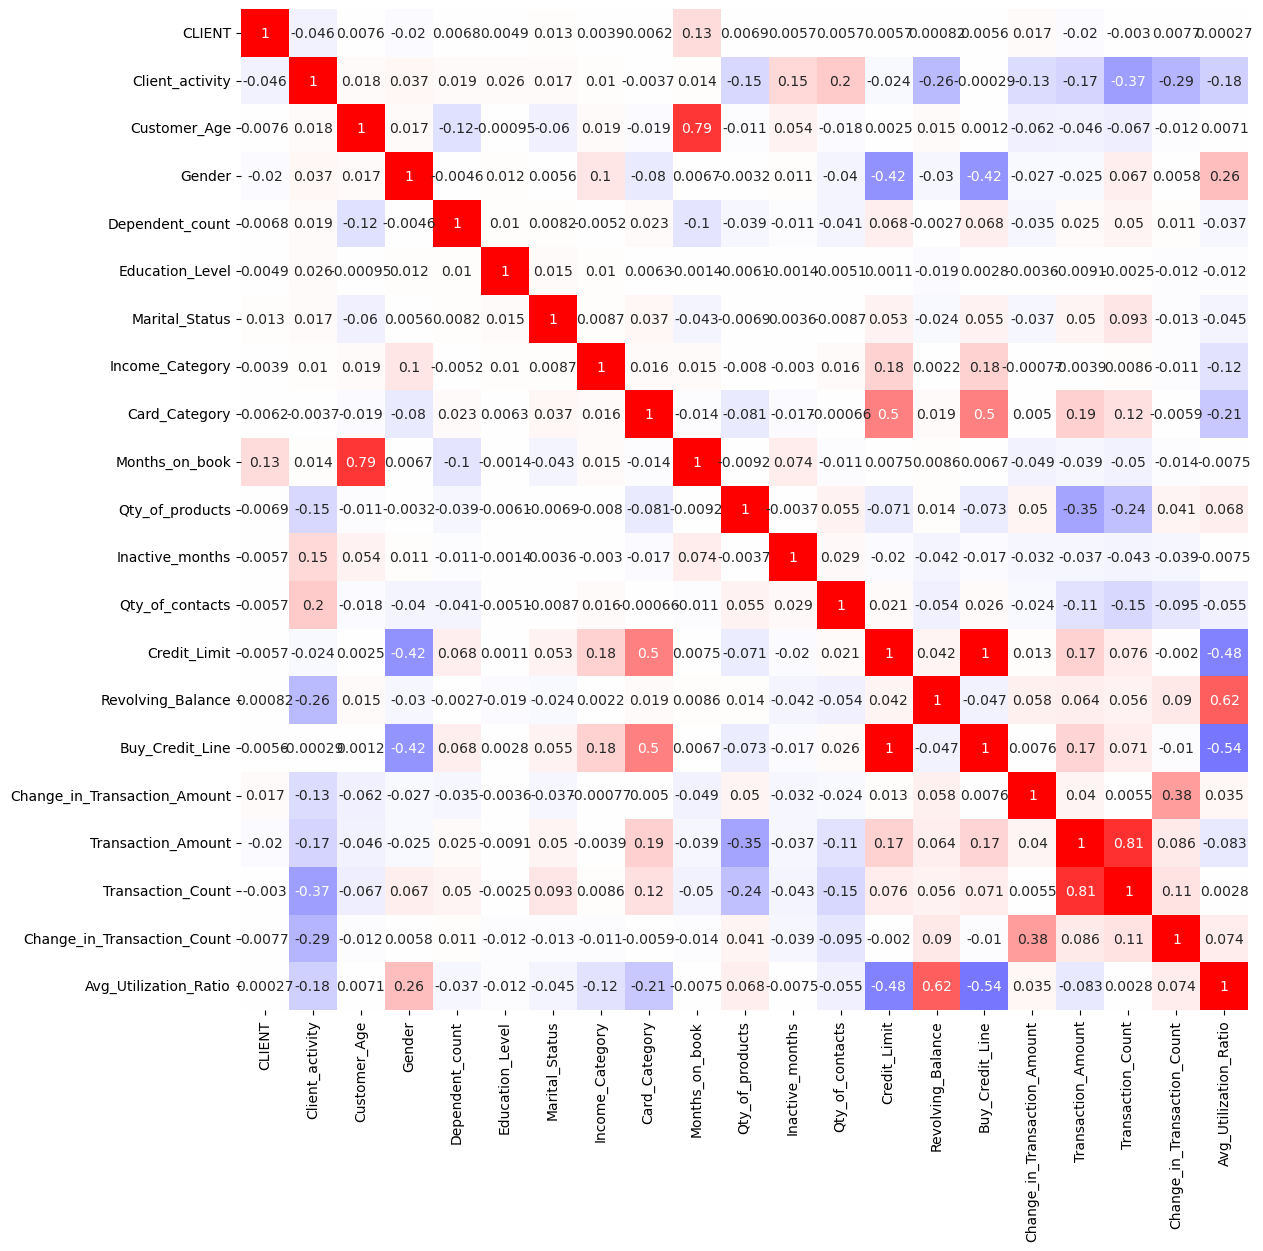

In [203]:
# коэффициенты корреляции Пирсона
plt.subplots(figsize = (13,13))
sns.heatmap(new_data2.corr(), annot = True, fmt='.2g', cbar=False, center= 0, cmap= 'bwr')

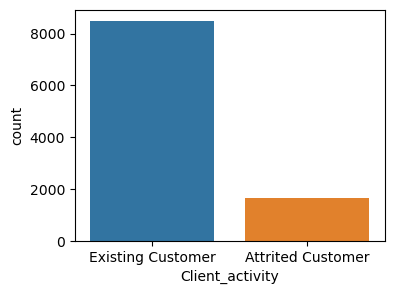

In [239]:
plt.figure(figsize=(4, 3))
sns.countplot(x="Client_activity", data=new_data)
plt.show()

In [240]:
new_data.Client_activity.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Client_activity, dtype: int64

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,46.659496,7.665652,26.0,41.0,47.0,52.0,68.0
Existing Customer,8500.0,46.262118,8.081157,26.0,41.0,46.0,52.0,73.0


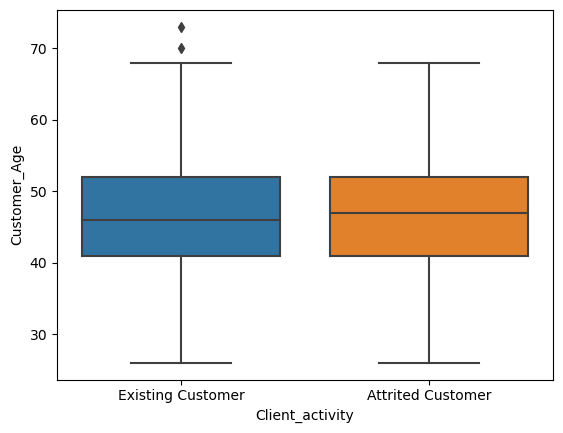

In [241]:
sns.boxplot(x="Client_activity", y="Customer_Age", data=new_data)
new_data.groupby('Client_activity')['Customer_Age'].describe()

In [242]:
# с целью построения нормализованной гистограммы разобьем данные на 2 выборки
nd_ac = new_data.where(new_data['Client_activity'] =='Attrited Customer')
nd_ec = new_data.where(new_data['Client_activity'] =='Existing Customer')

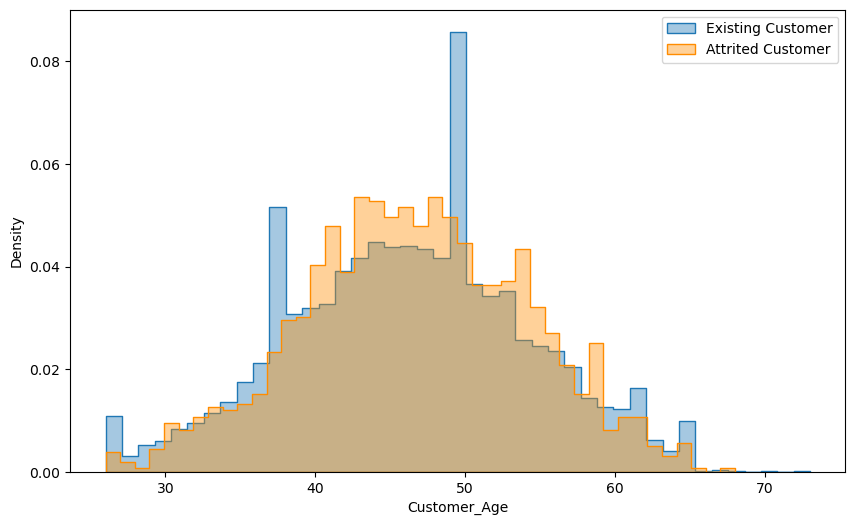

In [243]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=nd_ec, x='Customer_Age', element="step", stat="density", alpha=0.4, bins=43)
sns.histplot(data=nd_ac, x='Customer_Age', color='darkorange', element="step", stat="density", alpha=0.4, bins=43)
plt.legend(['Existing Customer','Attrited Customer'])

In [244]:
new_data['Client_activity'].value_counts() /10127*100

Existing Customer    83.934038
Attrited Customer    16.065962
Name: Client_activity, dtype: float64

In [245]:
x = new_data[new_data['Client_activity'] =='Attrited Customer']['Customer_Age']
y = new_data[new_data['Client_activity'] =='Existing Customer']['Customer_Age'].loc[lambda x : x < 70] #выбросы устранены

In [246]:
# выберем необходимое количество оставшихся клиентов для возможности проводить сравнение 2-х выборок
y = random.sample(list(y), 1627)

In [247]:
scipy.stats.fligner(x,y) #равенство дисперсий не отклонено

FlignerResult(statistic=5.287817582524187, pvalue=0.02147511636798697)

In [248]:
# T-критерий Стьюдента
scipy.stats.ttest_ind(x, y, equal_var=True)
#p-value больше альфа=0.05. гипотеза о равенстве возраста ушедших и оставшихся клиентов не отклонена

Ttest_indResult(statistic=1.8405626540229303, pvalue=0.06577673140697912)

In [250]:
# для построения гистограммы для номинальных данных создадим 2 выборки
at = new_data[new_data['Client_activity'] =='Attrited Customer']
ex = new_data[new_data['Client_activity'] =='Existing Customer']

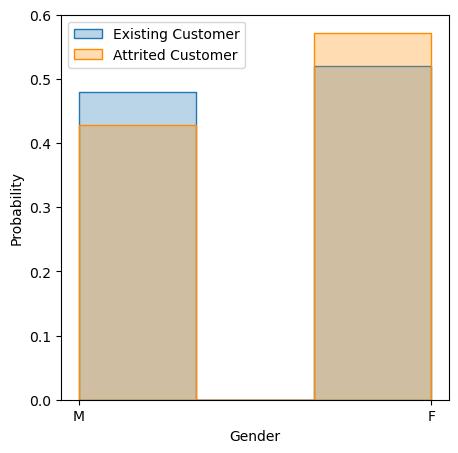

In [251]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(data=ex, x="Gender", stat='probability', element="step", discrete=False, alpha=0.3, bins=3)
sns.histplot(data=at, x="Gender", color='darkorange', stat='probability', element="step", discrete=False, alpha=0.3, bins=3)
plt.legend(['Existing Customer','Attrited Customer'], loc=2)

In [252]:
new_data.groupby('Client_activity')['Gender'].value_counts(normalize=True)*100

Client_activity    Gender
Attrited Customer  F         57.160418
                   M         42.839582
Existing Customer  F         52.094118
                   M         47.905882
Name: Gender, dtype: float64

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,2.402581,1.275010,0.0,2.0,2.0,3.0,5.0
Existing Customer,8500.0,2.335412,1.303229,0.0,1.0,2.0,3.0,5.0


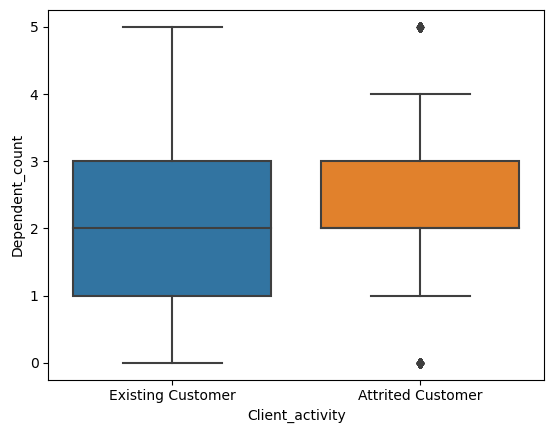

In [253]:
sns.boxplot(x="Client_activity", y='Dependent_count', data=new_data)
new_data.groupby('Client_activity')['Dependent_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,2.402581,1.275010,0.0,2.0,2.0,3.0,5.0
Existing Customer,8500.0,2.335412,1.303229,0.0,1.0,2.0,3.0,5.0


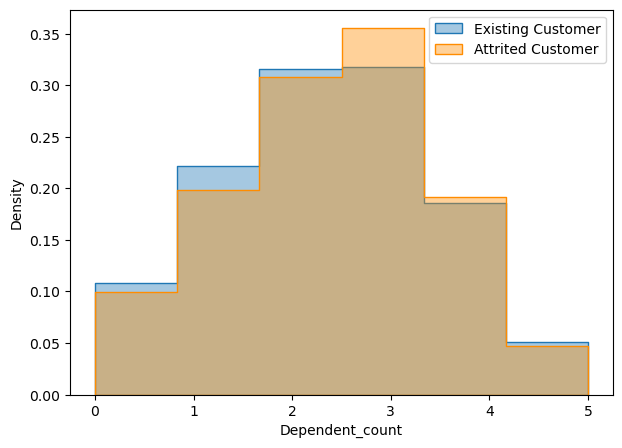

In [254]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(data=nd_ec, x='Dependent_count', element="step", stat="density", alpha=0.4, bins=6)
sns.histplot(data=nd_ac, x='Dependent_count', color='darkorange', element="step", stat="density", alpha=0.4, bins=6)
plt.legend(['Existing Customer','Attrited Customer'])
new_data.groupby('Client_activity')['Dependent_count'].describe()

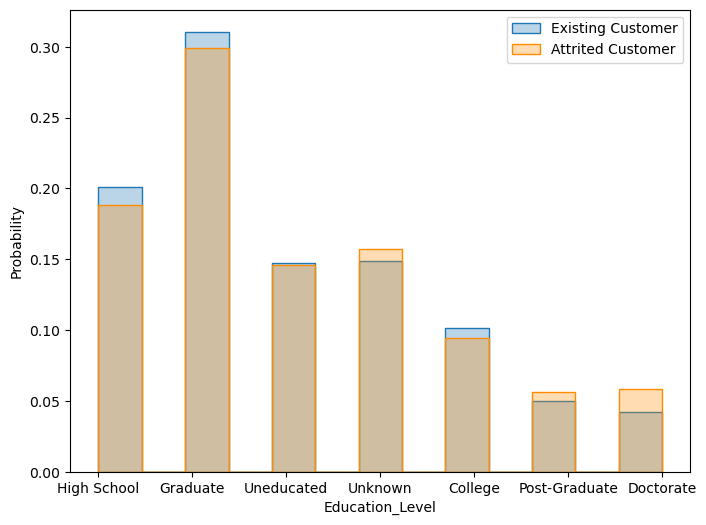

In [255]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=ex, x="Education_Level", stat='probability', element="step", discrete=False, alpha=0.3, bins=13)
sns.histplot(data=at, x="Education_Level", color='darkorange', stat='probability', element="step", discrete=False, alpha=0.3, bins=13)
plt.legend(['Existing Customer','Attrited Customer'])

In [256]:
new_data.groupby('Client_activity')['Education_Level'].value_counts(normalize=True)*100

Client_activity    Education_Level
Attrited Customer  Graduate           29.932391
                   High School        18.807621
                   Unknown            15.734481
                   Uneducated         14.566687
                   College             9.465274
                   Doctorate           5.838967
                   Post-Graduate       5.654579
Existing Customer  Graduate           31.070588
                   High School        20.082353
                   Unknown            14.858824
                   Uneducated         14.705882
                   College            10.105882
                   Post-Graduate       4.988235
                   Doctorate           4.188235
Name: Education_Level, dtype: float64

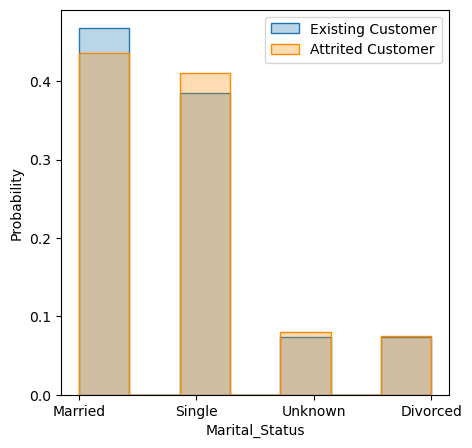

In [257]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(data=ex, x='Marital_Status', stat='probability', element="step", discrete=False, alpha=0.3, bins=7)
sns.histplot(data=at, x='Marital_Status', color='darkorange', stat='probability', element="step", discrete=False, alpha=0.3, bins=7)
plt.legend(['Existing Customer','Attrited Customer'])

In [258]:
new_data.groupby('Client_activity')['Marital_Status'].value_counts(normalize=True)*100

Client_activity    Marital_Status
Attrited Customer  Married           43.577136
                   Single            41.057160
                   Unknown            7.928703
                   Divorced           7.437001
Existing Customer  Married           46.800000
                   Single            38.529412
                   Divorced           7.376471
                   Unknown            7.294118
Name: Marital_Status, dtype: float64

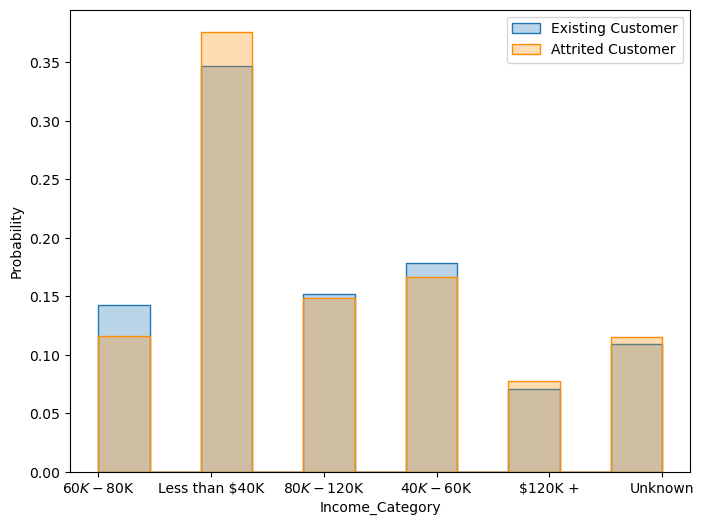

In [259]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=ex, x='Income_Category', stat='probability', element="step", discrete=False, alpha=0.3, bins=11)
sns.histplot(data=at, x='Income_Category', color='darkorange', stat='probability', element="step", discrete=False, alpha=0.3, bins=11)
plt.legend(['Existing Customer','Attrited Customer'])

In [260]:
new_data.groupby('Client_activity')['Income_Category'].value_counts(normalize=True)*100

Client_activity    Income_Category
Attrited Customer  Less than $40K     37.615243
                   $40K - $60K        16.656423
                   $80K - $120K       14.874001
                   $60K - $80K        11.616472
                   Unknown            11.493546
                   $120K +             7.744315
Existing Customer  Less than $40K     34.694118
                   $40K - $60K        17.870588
                   $80K - $120K       15.211765
                   $60K - $80K        14.270588
                   Unknown            10.882353
                   $120K +             7.070588
Name: Income_Category, dtype: float64

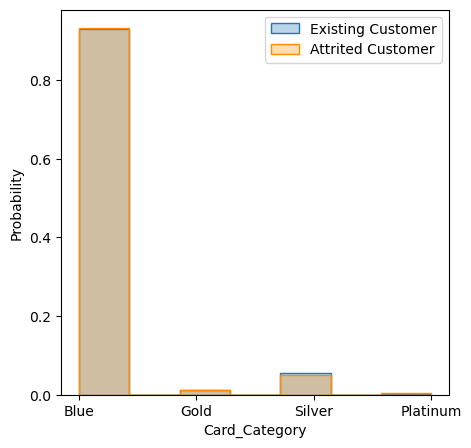

In [261]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(data=ex, x='Card_Category', stat='probability', element="step", discrete=False, alpha=0.3, bins=7)
sns.histplot(data=at, x='Card_Category', color='darkorange', stat='probability', element="step", discrete=False, alpha=0.3, bins=7)
plt.legend(['Existing Customer','Attrited Customer'])

In [262]:
new_data.groupby('Client_activity')['Card_Category'].value_counts(normalize=True)*100

Client_activity    Card_Category
Attrited Customer  Blue             93.362016
                   Silver            5.039951
                   Gold              1.290719
                   Platinum          0.307314
Existing Customer  Blue             93.141176
                   Silver            5.564706
                   Gold              1.117647
                   Platinum          0.176471
Name: Card_Category, dtype: float64

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,36.178242,7.796548,13.0,32.0,36.0,40.0,56.0
Existing Customer,8500.0,35.880588,8.021810,13.0,31.0,36.0,40.0,56.0


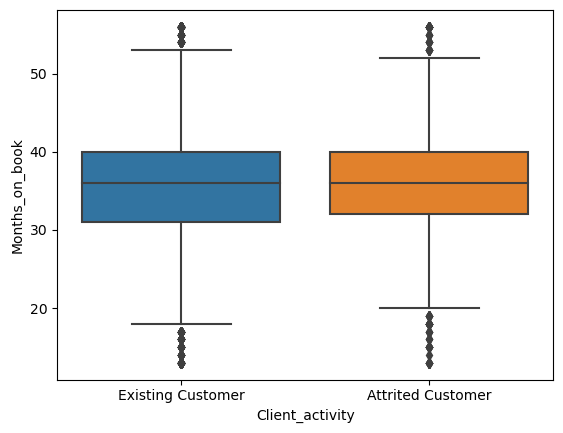

In [263]:
sns.boxplot(x="Client_activity", y="Months_on_book", data=new_data)
new_data.groupby('Client_activity')['Months_on_book'].describe()

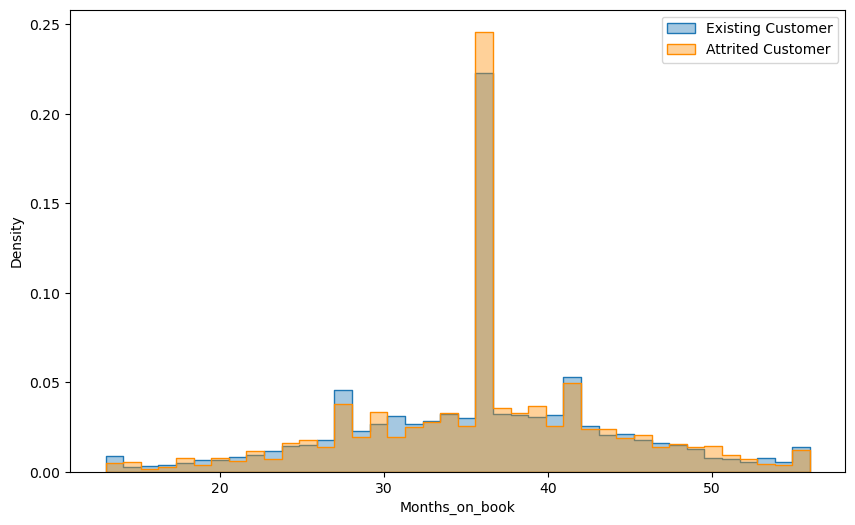

In [264]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=nd_ec, x='Months_on_book', element="step", stat="density", alpha=0.4, bins=40)
sns.histplot(data=nd_ac, x='Months_on_book', color='darkorange', element="step", stat="density", alpha=0.4, bins=40)
plt.legend(['Existing Customer','Attrited Customer'])

In [266]:
# процент ушедших клиентов, взаимодействовавших с банком 3 года
mb=new_data.groupby('Client_activity')['Months_on_book'].value_counts(normalize=True)
mb['Attrited Customer'][36]*100

26.429010448678547

In [267]:
# процент оставшихся клиентов, взаимодействовавших с банком 3 года
mb['Existing Customer'][36]*100

23.91764705882353

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,3.279656,1.577782,1.0,2.0,3.0,5.0,6.0
Existing Customer,8500.0,3.914588,1.528949,1.0,3.0,4.0,5.0,6.0


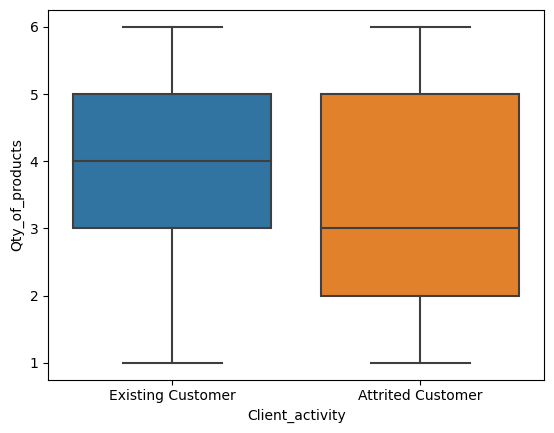

In [268]:
sns.boxplot(x="Client_activity", y="Qty_of_products", data=new_data)
new_data.groupby('Client_activity')['Qty_of_products'].describe()

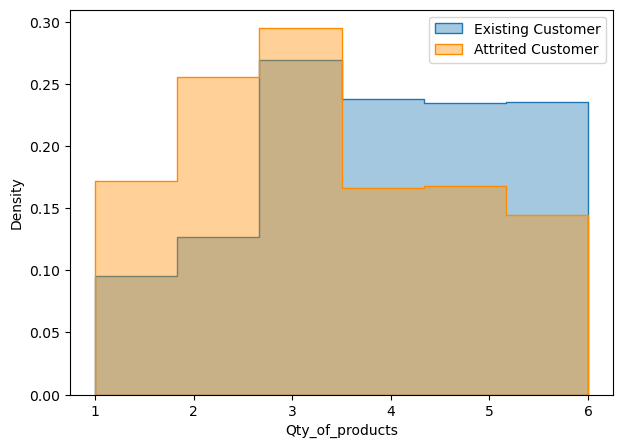

In [269]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(data=nd_ec, x='Qty_of_products', element="step", stat="density", alpha=0.4, bins=6)
sns.histplot(data=nd_ac, x='Qty_of_products', color='darkorange', element="step", stat="density", alpha=0.4, bins=6)
plt.legend(['Existing Customer','Attrited Customer'])

In [270]:
new_data.groupby('Client_activity')['Qty_of_products'].value_counts(normalize=True)*100

Client_activity    Qty_of_products
Attrited Customer  3                  24.585126
                   2                  21.266134
                   1                  14.320836
                   5                  13.952059
                   4                  13.829133
                   6                  12.046712
Existing Customer  3                  22.411765
                   4                  19.847059
                   6                  19.647059
                   5                  19.576471
                   2                  10.552941
                   1                   7.964706
Name: Qty_of_products, dtype: float64

In [271]:
x = new_data[new_data['Client_activity'] =='Attrited Customer']['Qty_of_products']
y = new_data[new_data['Client_activity'] =='Existing Customer']['Qty_of_products']

In [272]:
# выберем необходимое количество оставшихся клиентов для возможности проводить сравнение 2-х выборок
y = random.sample(list(y), 1627)

In [273]:
scipy.stats.fligner(x,y) #равенство дисперсий не отклонено

FlignerResult(statistic=1.2771466255556816, pvalue=0.2584302468435755)

In [274]:
# T-критерий Стьюдента
scipy.stats.ttest_ind(x, y, equal_var=True)
#гипотеза об идентичном количестве используемых банковских продуктов оставшимися и ушедшими клиентами отклонена

Ttest_indResult(statistic=-11.934130132444702, pvalue=3.6530148070329785e-32)

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,2.693301,0.899623,0.0,2.0,3.0,3.0,6.0
Existing Customer,8500.0,2.273765,1.016741,0.0,1.0,2.0,3.0,6.0


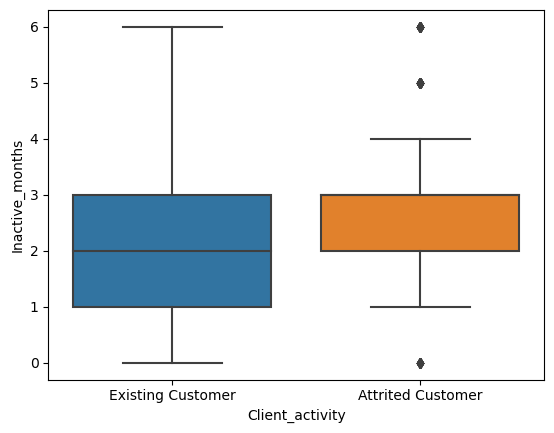

In [275]:
sns.boxplot(x="Client_activity", y="Inactive_months", data=new_data)
new_data.groupby('Client_activity')['Inactive_months'].describe()

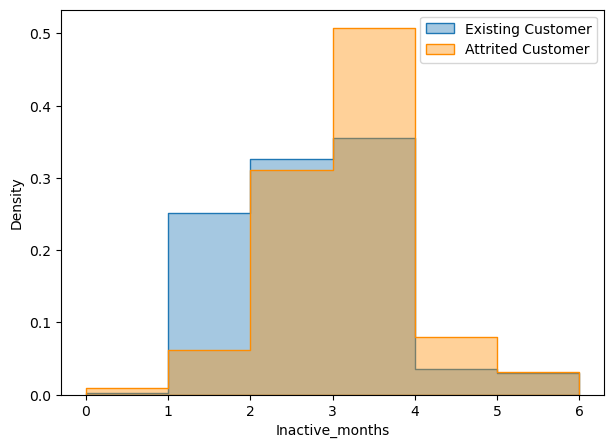

In [276]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(data=nd_ec, x='Inactive_months', element="step", stat="density", alpha=0.4, bins=6)
sns.histplot(data=nd_ac, x='Inactive_months', color='darkorange', element="step", stat="density", alpha=0.4, bins=6)
plt.legend(['Existing Customer','Attrited Customer'])

In [277]:
x = new_data[new_data['Client_activity'] =='Attrited Customer']['Inactive_months']
y = new_data[new_data['Client_activity'] =='Existing Customer']['Inactive_months']

In [278]:
# выберем необходимое количество оставшихся клиентов для возможности проводить сравнение 2-х выборок
y = random.sample(list(y), 1627)

In [279]:
scipy.stats.fligner(x,y) #гипотеза о равенстве дисперсий отклонена

FlignerResult(statistic=24.387915530472387, pvalue=7.876120549366472e-07)

In [280]:
# T-критерий Стьюдента
scipy.stats.ttest_ind(x, y, equal_var=False)
#гипотеза об идентичности времени отсутствия взаимодействия с банком для 2-х выборок отклонена

Ttest_indResult(statistic=13.26353887154438, pvalue=3.947890463868305e-39)

In [281]:
new_data.groupby('Client_activity')['Inactive_months'].value_counts(normalize=True)*100

Client_activity    Inactive_months
Attrited Customer  3                  50.768285
                   2                  31.038722
                   4                   7.990166
                   1                   6.146281
                   5                   1.966810
                   6                   1.167793
                   0                   0.921942
Existing Customer  3                  35.529412
                   2                  32.670588
                   1                  25.094118
                   4                   3.588235
                   5                   1.717647
                   6                   1.235294
                   0                   0.164706
Name: Inactive_months, dtype: float64

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,2.972342,1.090537,0.0,2.0,3.0,4.0,6.0
Existing Customer,8500.0,2.356353,1.081436,0.0,2.0,2.0,3.0,5.0


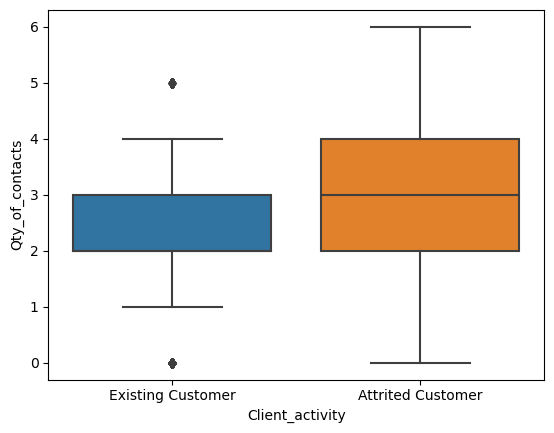

In [282]:
sns.boxplot(x="Client_activity", y="Qty_of_contacts", data=new_data)
new_data.groupby('Client_activity')['Qty_of_contacts'].describe()

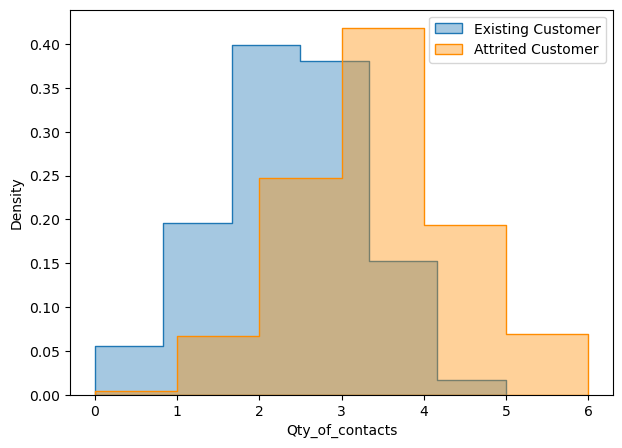

In [283]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(data=nd_ec, x='Qty_of_contacts', element="step", stat="density", alpha=0.4, bins=6)
sns.histplot(data=nd_ac, x='Qty_of_contacts', color='darkorange', element="step", stat="density", alpha=0.4, bins=6)
plt.legend(['Existing Customer','Attrited Customer'])

In [284]:
x = new_data[new_data['Client_activity'] =='Attrited Customer']['Qty_of_contacts']
y = new_data[new_data['Client_activity'] =='Existing Customer']['Qty_of_contacts']

In [285]:
# выберем необходимое количество оставшихся клиентов для возможности проводить сравнение 2-х выборок
y = random.sample(list(y), 1627)

In [286]:
scipy.stats.fligner(x,y) #гипотеза о равенстве дисперсий отклонена

FlignerResult(statistic=11.554696158146694, pvalue=0.0006757835078857717)

In [287]:
# T-критерий Стьюдента
scipy.stats.ttest_ind(x, y, equal_var=False)
#гипотеза об идентичности количества обращений в банк для 2-х выборок отклонена

Ttest_indResult(statistic=15.538320295008822, pvalue=1.4203324185729704e-52)

In [288]:
new_data.groupby('Client_activity')['Qty_of_contacts'].value_counts(normalize=True)*100

Client_activity    Qty_of_contacts
Attrited Customer  3                  41.856177
                   2                  24.769514
                   4                  19.360787
                   1                   6.637984
                   5                   3.626306
                   6                   3.318992
                   0                   0.430240
Existing Customer  2                  33.223529
                   3                  31.752941
                   1                  16.364706
                   4                  12.670588
                   0                   4.611765
                   5                   1.376471
Name: Qty_of_contacts, dtype: float64

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,8136.039459,9095.334105,1438.3,2114.0,4178.0,9933.50,34516.0
Existing Customer,8500.0,8726.877518,9084.969807,1438.3,2602.0,4643.5,11252.75,34516.0


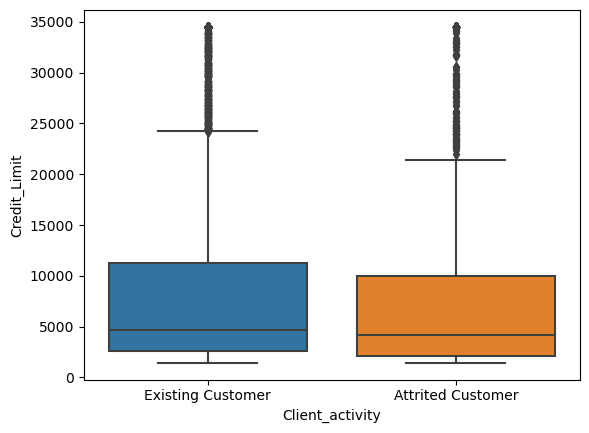

In [289]:
sns.boxplot(x="Client_activity", y="Credit_Limit", data=new_data)
new_data.groupby('Client_activity')['Credit_Limit'].describe()

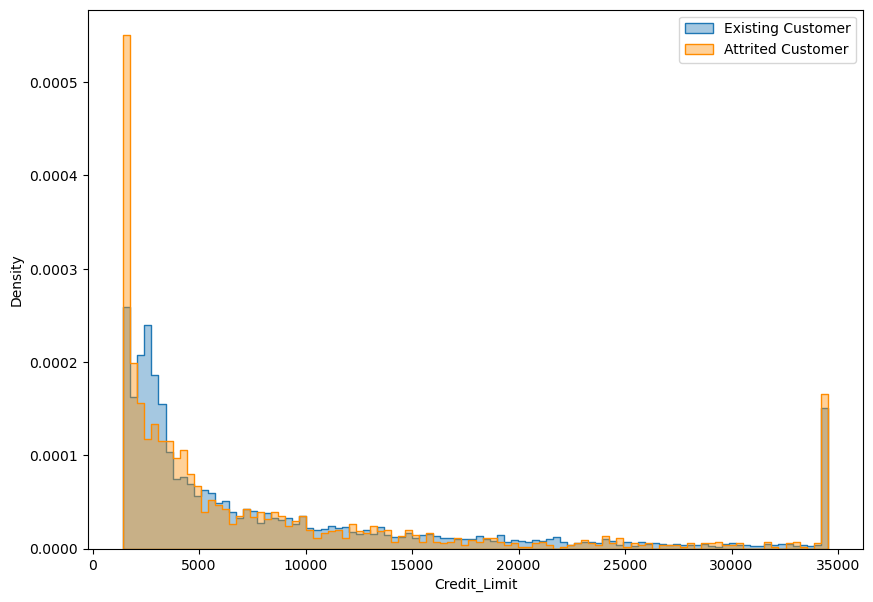

In [290]:
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(data=nd_ec, x='Credit_Limit', element="step", stat="density", alpha=0.4, bins=100)
sns.histplot(data=nd_ac, x='Credit_Limit', color='darkorange', element="step", stat="density", alpha=0.4, bins=100)
plt.legend(['Existing Customer','Attrited Customer'])

In [291]:
# доля ушедших клиентов с минимальным(1438.3$) и максимальным(34516$) лимитом по кредитной карте
cl = new_data.groupby('Client_activity')['Credit_Limit'].value_counts(normalize=True)*100
cl['Attrited Customer'][[1438.3, 34516]] 

Credit_Limit
1438.3     7.621389
34516.0    5.470191
Name: Credit_Limit, dtype: float64

In [292]:
# доля оставшихся клиентов с минимальным(1438.3$) и максимальным(34516$) лимитом по кредитной карте
cl['Existing Customer'][[1438.3, 34516]]

Credit_Limit
1438.3     4.505882
34516.0    4.929412
Name: Credit_Limit, dtype: float64

In [293]:
# уберем из набора данных минимальный(1438,3$) и максимальный(34516$) лимит по кредитной карте, чтобы оценить характер распределения данных
cldel = new_data.loc[~new_data['Credit_Limit'].isin([1438.3, 34516])]

In [294]:
#с целью построения нормализованной гистограммы разобьем данные на 2 выборки
nd_ac2 = cldel.where(cldel['Client_activity'] =='Attrited Customer')
nd_eс2 = cldel.where(cldel['Client_activity'] =='Existing Customer')

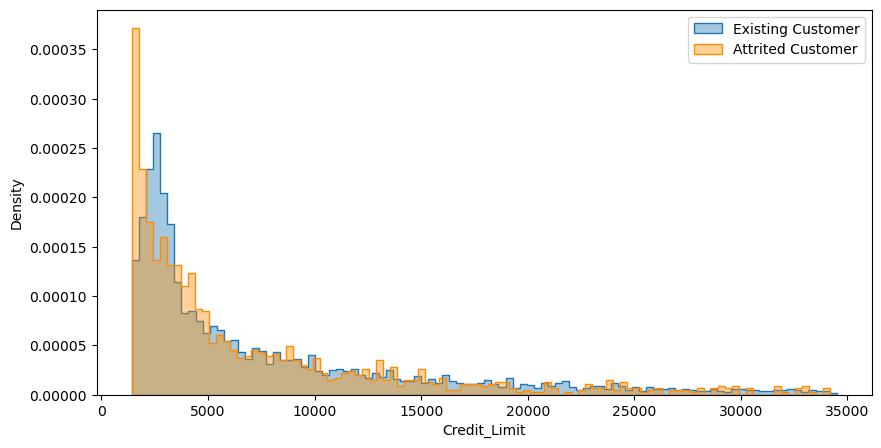

In [295]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_eс2, x='Credit_Limit', element="step", stat="density", alpha=0.4, bins=100)
sns.histplot(data=nd_ac2, x='Credit_Limit', color='darkorange', element="step", stat="density", alpha=0.4, bins=100)
plt.legend(['Existing Customer','Attrited Customer'])

In [296]:
x = cldel[cldel['Client_activity'] =='Attrited Customer']['Credit_Limit']
y = cldel[cldel['Client_activity'] =='Existing Customer']['Credit_Limit']
y = random.sample(list(y), 1414)

In [297]:
scipy.stats.fligner(x,y) #гипотеза о равенстве дисперсий не отклонена

FlignerResult(statistic=2.2154578435690078, pvalue=0.13663452163511627)

In [298]:
# T-критерий Стьюдента
scipy.stats.ttest_ind(x, y, equal_var=True)
#гипотеза об идентичности лимитов по кредитной карте для 2-х выборок не отклонена

Ttest_indResult(statistic=-2.54044704857527, pvalue=0.011124170570421796)

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,672.822987,921.385582,0.0,0.0,0.0,1303.5,2517.0
Existing Customer,8500.0,1256.604118,757.745354,0.0,800.0,1364.0,1807.0,2517.0


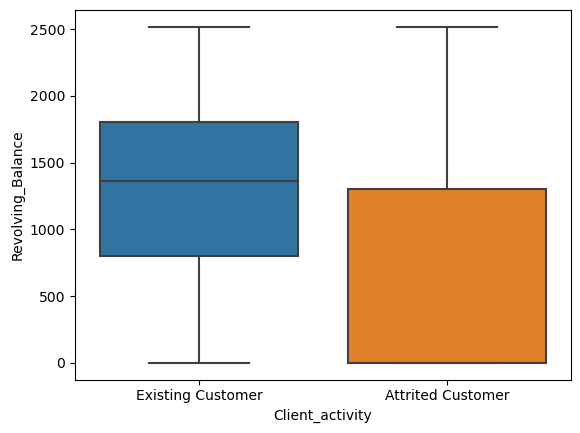

In [299]:
sns.boxplot(x="Client_activity", y="Revolving_Balance", data=new_data)
new_data.groupby('Client_activity')['Revolving_Balance'].describe()

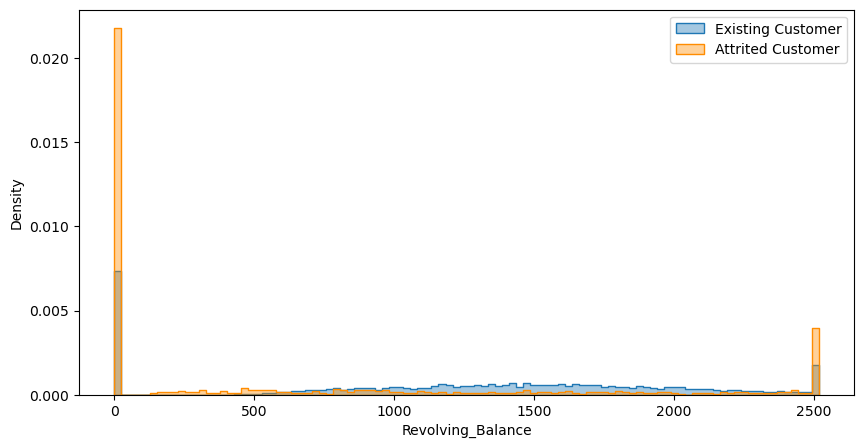

In [300]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_ec, x='Revolving_Balance', element="step", stat="density", alpha=0.4, bins=100)
sns.histplot(data=nd_ac, x='Revolving_Balance', color='darkorange', element="step", stat="density", alpha=0.4, bins=100)
plt.legend(['Existing Customer','Attrited Customer'])

In [301]:
# доля ушедших клиентов, не использовавших возобновляемый баланс(0$) и использовавших его в полном размере(2517$)
rb = new_data.groupby('Client_activity')['Revolving_Balance'].value_counts(normalize=True)
rb['Attrited Customer'][[0, 2517]] *100

Revolving_Balance
0       54.886294
2517     9.711125
Name: Revolving_Balance, dtype: float64

In [302]:
# доля оставшихся клиентов, не использовавших возобновляемый баланс(0$) и использовавших его в полном размере(2517$)
rb['Existing Customer'][[0, 2517]] *100

Revolving_Balance
0       18.552941
2517     4.117647
Name: Revolving_Balance, dtype: float64

In [303]:
# уберем из набора данных нулевой и максимальный возобновляемый баланс, чтобы оценить характер распределения данных
rbdel = new_data.loc[~new_data['Revolving_Balance'].isin([0, 2517])]

In [304]:
# с целью построения нормализованной гистограммы разобьем данные на 2 выборки
nd_ac2 = rbdel.where(rbdel['Client_activity'] =='Attrited Customer')
nd_eс2 = rbdel.where(rbdel['Client_activity'] =='Existing Customer')

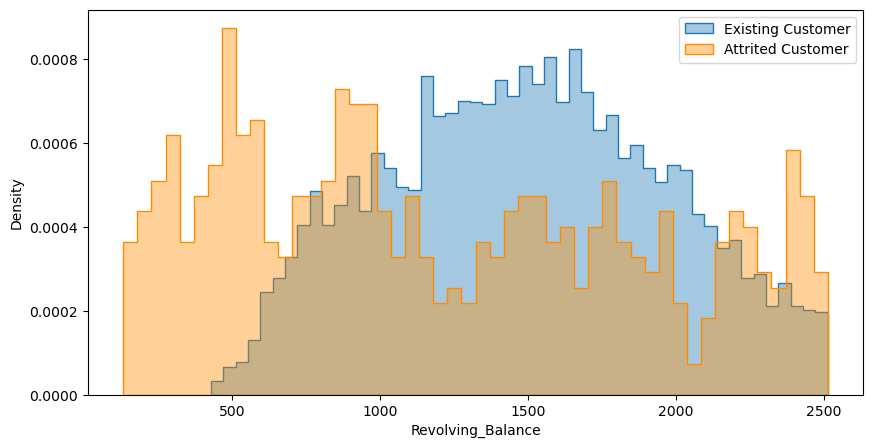

In [305]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_eс2, x='Revolving_Balance', element="step", stat="density", alpha=0.4, bins=50)
sns.histplot(data=nd_ac2, x='Revolving_Balance', color='darkorange', element="step", stat="density", alpha=0.4, bins=50)
plt.legend(['Existing Customer','Attrited Customer'])

In [306]:
y = rbdel[rbdel['Client_activity'] =='Existing Customer']['Revolving_Balance']
y = random.sample(list(y), 4500) #выполнение условия для проведения теста n < 5000
scipy.stats.shapiro(y) #гипотеза о нормальности распределения отклонена

ShapiroResult(statistic=0.9858109951019287, pvalue=7.176281336799085e-21)

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,7463.216472,9109.208129,3.0,1587.0,3488.0,9257.50,34516.0
Existing Customer,8500.0,7470.273400,9087.671862,15.0,1184.5,3469.5,9978.25,34516.0


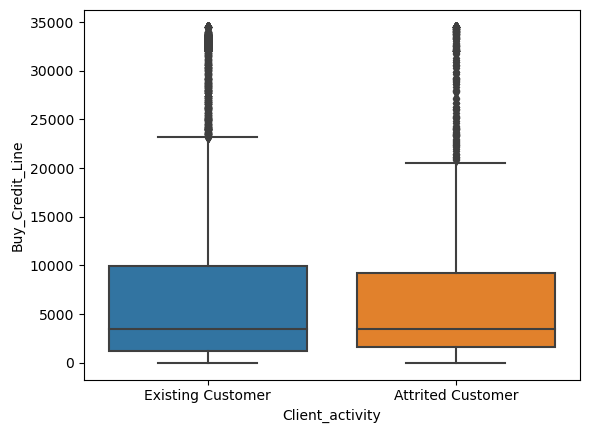

In [307]:
sns.boxplot(x="Client_activity", y="Buy_Credit_Line", data=new_data)
new_data.groupby('Client_activity')['Buy_Credit_Line'].describe()

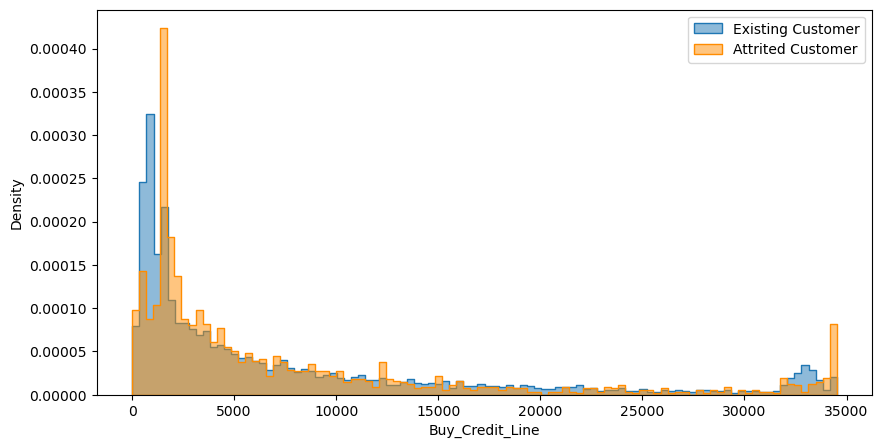

In [308]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_ec, x='Buy_Credit_Line', element="step", stat="density", alpha=0.5, bins=100)
sns.histplot(data=nd_ac, x='Buy_Credit_Line', color='darkorange', element="step", stat="density", alpha=0.5, bins=100)
plt.legend(['Existing Customer','Attrited Customer'])

In [309]:
# для данных с суммой кредитной линии меньше 6538 долларов
bcl = new_data.query('Buy_Credit_Line < 6538')

<Axes: xlabel='Client_activity', ylabel='Buy_Credit_Line'>

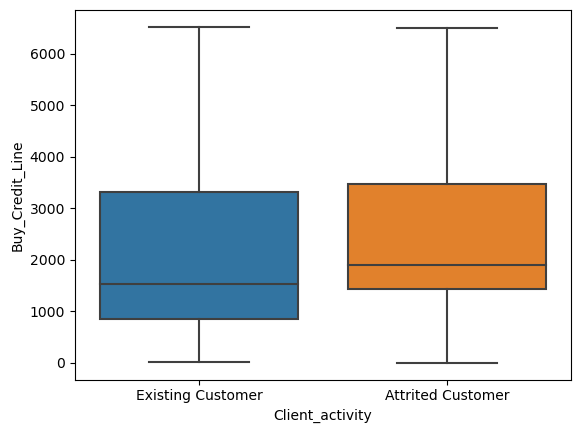

In [310]:
sns.boxplot(x="Client_activity", y="Buy_Credit_Line", data=bcl)

In [311]:
x = bcl[bcl['Client_activity'] =='Attrited Customer']['Buy_Credit_Line']
y = bcl[bcl['Client_activity'] =='Existing Customer']['Buy_Credit_Line']
y = random.sample(list(y), 1081)

In [312]:
scipy.stats.fligner(x,y) #гипотеза о равенстве дисперсий не отклонена

FlignerResult(statistic=4.871447205940192, pvalue=0.027304592857238078)

In [313]:
# T-критерий Стьюдента
scipy.stats.ttest_ind(x, y, equal_var=True)
#гипотеза об идентичности суммы кредитной линии для 2-х выборок отклонена

Ttest_indResult(statistic=2.43817130508308, pvalue=0.01484188800639194)

In [314]:
# для данных с суммой кредитной линии больше 31000 долларов
bcl2 = new_data.query('Buy_Credit_Line > 31000')

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,101.0,33626.188119,1011.072151,31121.0,32669.0,34084.0,34516.0,34516.0
Existing Customer,481.0,33055.139293,786.322143,31069.0,32506.0,33025.0,33492.0,34516.0


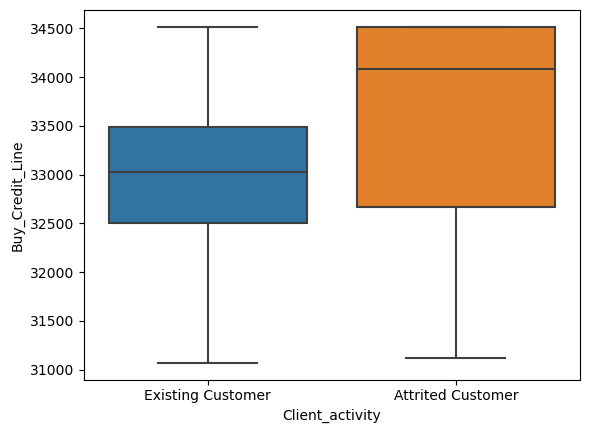

In [315]:
sns.boxplot(x="Client_activity", y="Buy_Credit_Line", data=bcl2)
bcl2.groupby('Client_activity')['Buy_Credit_Line'].describe()

In [316]:
# коэффициент корреляции Кредитной линии на сумму от 31000 долларов и Активностью клиента
bcl2['Buy_Credit_Line'].corr(new_data2['Client_activity'])
#наблюдается слабая связь

0.25270971884955923

In [317]:
x = bcl2[bcl2['Client_activity'] =='Attrited Customer']['Revolving_Balance']
y = bcl2[bcl2['Client_activity'] =='Existing Customer']['Revolving_Balance']
y = random.sample(list(y), 101)

In [318]:
scipy.stats.fligner(x,y) #гипотеза о равенстве дисперсий не отклонена

FlignerResult(statistic=0.2612683378978246, pvalue=0.609250125747977)

In [319]:
# T-критерий Стьюдента
scipy.stats.ttest_ind(x, y, equal_var=False)
#гипотеза об идентичности суммы кредитной линии для 2-х выборок отклонена

Ttest_indResult(statistic=-4.942782686229993, pvalue=1.6440398870605747e-06)

In [320]:
# для целей визуализации разобьем данные по сумме кредитной линии от 31000 долларов на 2 выборки
nd_ac2 = bcl2.where(new_data['Client_activity'] =='Attrited Customer')
nd_eс2 = bcl2.where(new_data['Client_activity'] =='Existing Customer')

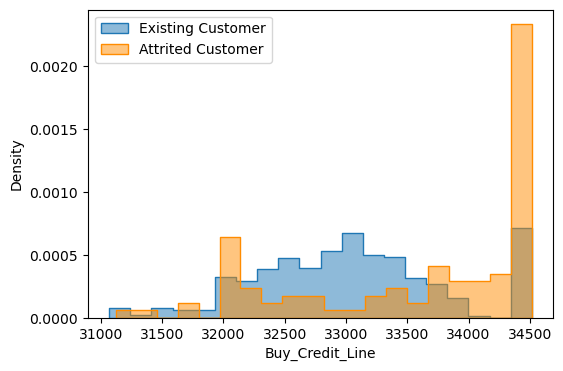

In [321]:
# гистограмма для кредитной линии от 31000 долларов
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=nd_eс2, x='Buy_Credit_Line', element="step", stat="density", alpha=0.5, bins=20)
sns.histplot(data=nd_ac2, x='Buy_Credit_Line', color='darkorange', element="step", stat="density", alpha=0.5, bins=20)
plt.legend(['Existing Customer','Attrited Customer'], loc=2)

In [322]:
nd_ac.groupby('Client_activity')['Buy_Credit_Line'].value_counts().iloc[0:5]

Client_activity    Buy_Credit_Line
Attrited Customer  1438.3             96
                   34516.0            39
                   31999.0            10
                   1568.0              3
                   1695.0              3
Name: Buy_Credit_Line, dtype: int64

In [323]:
y = rbdel[rbdel['Client_activity'] =='Existing Customer']['Revolving_Balance']
y = random.sample(list(y), 4500) #выполнение условия для проведения теста n < 5000
scipy.stats.shapiro(y) #гипотеза о нормальности распределения отклонена

ShapiroResult(statistic=0.9860634803771973, pvalue=1.1148376788884581e-20)

Client_activity
Attrited Customer    Axes(0.125,0.11;0.775x0.77)
Existing Customer    Axes(0.125,0.11;0.775x0.77)
Name: Buy_Credit_Line, dtype: object

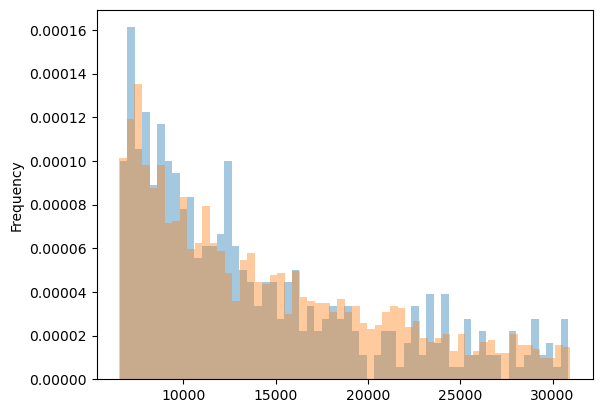

In [324]:
new_data.query('Buy_Credit_Line > 6538 & Buy_Credit_Line < 31000').groupby('Client_activity')['Buy_Credit_Line'].plot.hist(density=1, alpha=0.4, bins=60)

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,0.694277,0.214924,0.000,0.5445,0.701,0.856,1.492
Existing Customer,8500.0,0.772510,0.217783,0.256,0.6430,0.743,0.860,3.397


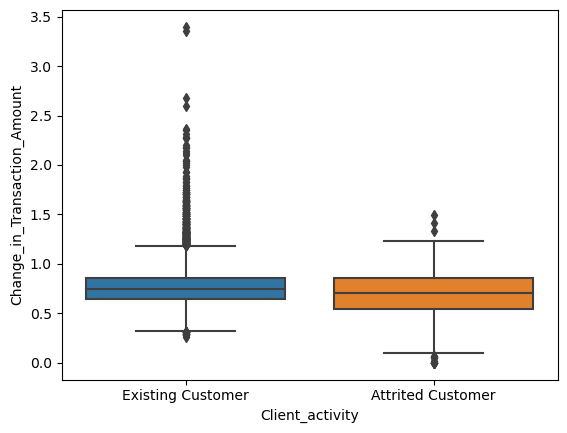

In [325]:
sns.boxplot(x="Client_activity", y="Change_in_Transaction_Amount", data=new_data)
new_data.groupby('Client_activity')['Change_in_Transaction_Amount'].describe()

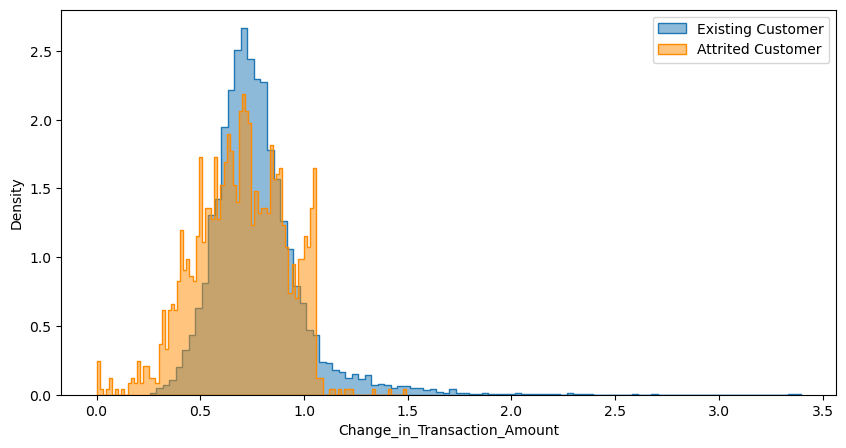

In [326]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_ec, x='Change_in_Transaction_Amount', element="step", stat="density", alpha=0.5, bins=100)
sns.histplot(data=nd_ac, x='Change_in_Transaction_Amount', color='darkorange', element="step", stat="density", alpha=0.5, bins=100)
plt.legend(['Existing Customer','Attrited Customer'])

In [327]:
x = new_data[new_data['Client_activity'] =='Attrited Customer']['Change_in_Transaction_Amount']
y = new_data[new_data['Client_activity'] =='Existing Customer']['Change_in_Transaction_Amount']
y = random.sample(list(y), 4999)

In [328]:
scipy.stats.shapiro(x) #гипотеза о нормальности для ушедших клиентов распределения отклонена

ShapiroResult(statistic=0.9903687834739685, pvalue=6.9833063776059134e-09)

In [329]:
scipy.stats.shapiro(y) #гипотеза о нормальности для оставшихся распределения отклонена

ShapiroResult(statistic=0.8632123470306396, pvalue=0.0)

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,3095.025814,2308.227629,510.0,1903.50,2329.0,2772.00,10583.0
Existing Customer,8500.0,4654.655882,3512.772635,816.0,2384.75,4100.0,4781.25,18484.0


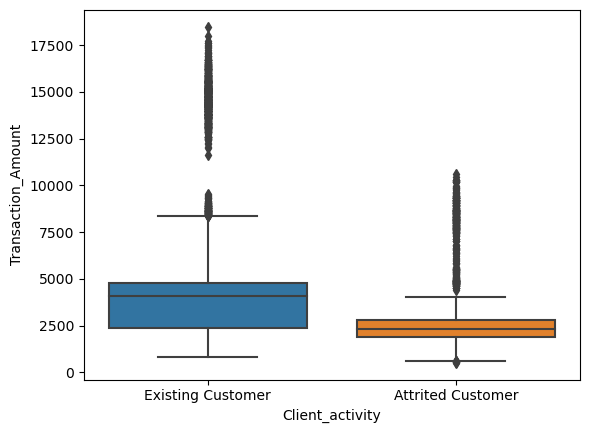

In [330]:
sns.boxplot(x="Client_activity", y='Transaction_Amount', data=new_data)
new_data.groupby('Client_activity')['Transaction_Amount'].describe()

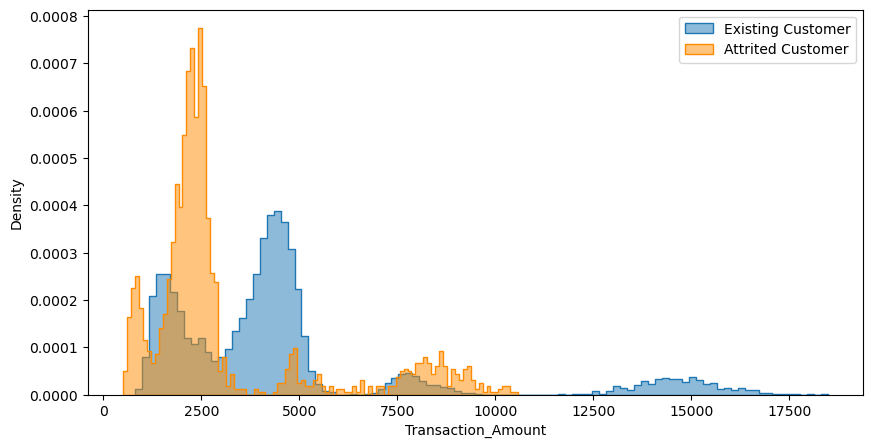

In [331]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_ec, x='Transaction_Amount', element="step", stat="density", alpha=0.5, bins=100)
sns.histplot(data=nd_ac, x='Transaction_Amount', color='darkorange', element="step", stat="density", alpha=0.5, bins=100)
plt.legend(['Existing Customer','Attrited Customer'])

In [332]:
# суммы, на которые ушедшие клиенты проводили операции чаще всего
ta=new_data.groupby('Client_activity')['Transaction_Amount'].value_counts(normalize=True)
ta['Attrited Customer'].iloc[0:5]*100

Transaction_Amount
2108    0.307314
2216    0.307314
2312    0.307314
2164    0.245851
2196    0.245851
Name: Transaction_Amount, dtype: float64

In [333]:
# суммы, на которые оставшиеся клиенты проводили операции чаще всего
ta=new_data.groupby('Client_activity')['Transaction_Amount'].value_counts(normalize=True)
ta['Existing Customer'].iloc[0:5]*100

Transaction_Amount
4253    0.129412
4509    0.129412
4518    0.117647
4037    0.105882
4042    0.105882
Name: Transaction_Amount, dtype: float64

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,44.933620,14.568429,10.0,37.0,43.0,51.0,94.0
Existing Customer,8500.0,68.672588,22.919011,11.0,54.0,71.0,82.0,139.0


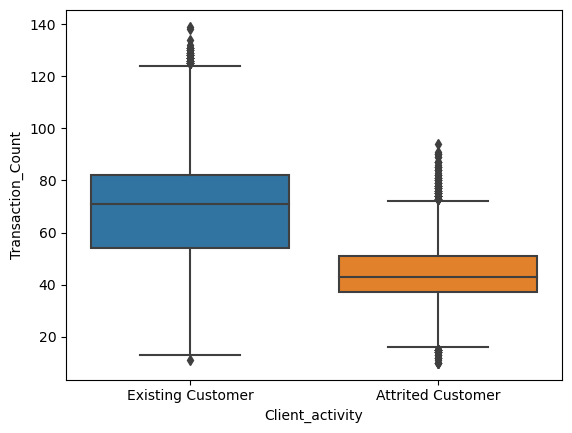

In [334]:
sns.boxplot(x="Client_activity", y="Transaction_Count", data=new_data)
new_data.groupby('Client_activity')['Transaction_Count'].describe()

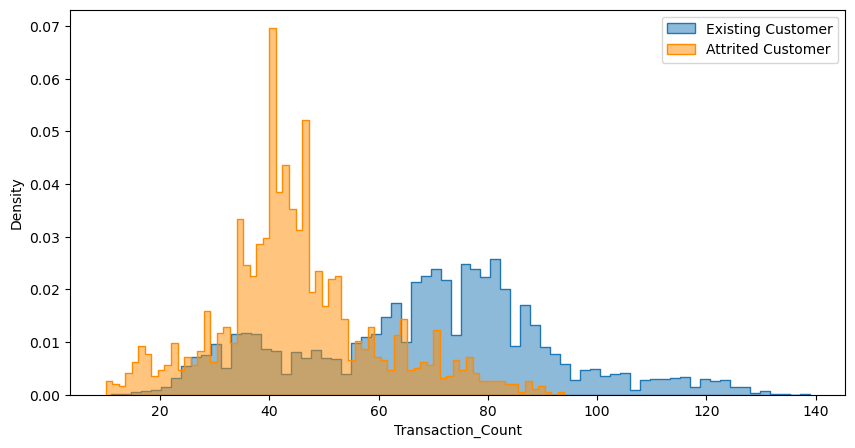

In [335]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_ec, x='Transaction_Count', element="step", stat="density", alpha=0.5, bins=70)
sns.histplot(data=nd_ac, x='Transaction_Count', color='darkorange', element="step", stat="density", alpha=0.5, bins=70)
plt.legend(['Existing Customer','Attrited Customer'])

In [336]:
x = new_data[new_data['Client_activity'] =='Attrited Customer']['Transaction_Count']
scipy.stats.shapiro(x) #гипотеза о нормальности распределения отклонена

ShapiroResult(statistic=0.9690865278244019, pvalue=3.4190445624840737e-18)

In [337]:
# количество операций оставшиеся клиенты проводили чаще всего
tc=new_data.groupby('Client_activity')['Transaction_Count'].value_counts(normalize=True)
tc['Attrited Customer'].iloc[0:5]*100

Transaction_Count
43    5.224339
42    4.609711
40    4.240934
44    4.240934
41    4.118009
Name: Transaction_Count, dtype: float64

In [338]:
# количество операций оставшиеся клиенты проводили чаще всего
tc['Existing Customer'].iloc[0:5]*100

Transaction_Count
81    2.388235
82    2.329412
75    2.282353
69    2.247059
76    2.247059
Name: Transaction_Count, dtype: float64

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,0.554386,0.226854,0.000,0.400,0.531,0.692,2.500
Existing Customer,8500.0,0.742434,0.228054,0.028,0.617,0.721,0.833,3.714


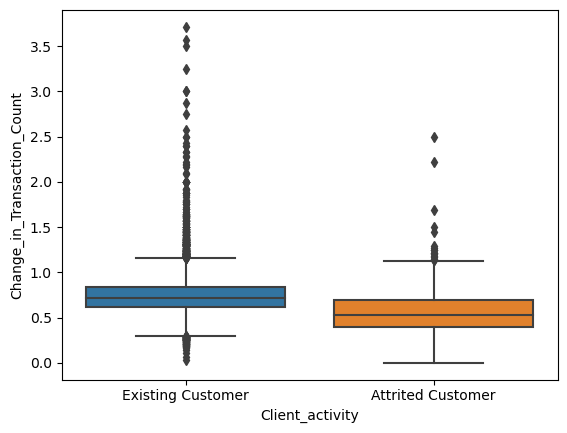

In [339]:
sns.boxplot(x="Client_activity", y="Change_in_Transaction_Count", data=new_data)
new_data.groupby('Client_activity')['Change_in_Transaction_Count'].describe()

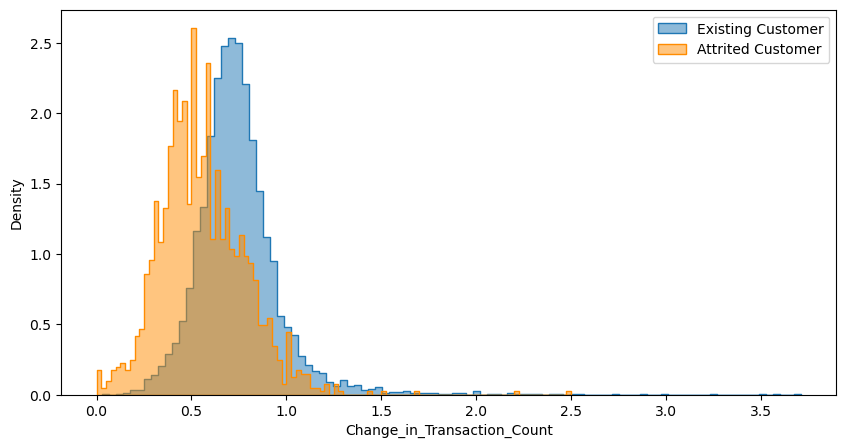

In [340]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_ec, x='Change_in_Transaction_Count', element="step", stat="density", alpha=0.5, bins=100)
sns.histplot(data=nd_ac, x='Change_in_Transaction_Count', color='darkorange', element="step", stat="density", alpha=0.5, bins=100)
plt.legend(['Existing Customer','Attrited Customer'])

In [341]:
x = new_data[new_data['Client_activity'] =='Attrited Customer']['Change_in_Transaction_Amount']
y = new_data[new_data['Client_activity'] =='Existing Customer']['Change_in_Transaction_Amount']
y = random.sample(list(y), 1627)

In [342]:
scipy.stats.fligner(x,y) #гипотеза о равенстве дисперсий отклонена

FlignerResult(statistic=51.490395995536794, pvalue=7.194820602192717e-13)

In [343]:
# T-критерий Стьюдента
scipy.stats.ttest_ind(x, y, equal_var=False)
#гипотеза об идентичности показателя изменения количества транзакций отклонена

Ttest_indResult(statistic=-10.580201530312442, pvalue=9.606161898345673e-26)

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,1627.0,0.162475,0.264458,0.0,0.000,0.000,0.23100,0.999
Existing Customer,8500.0,0.296412,0.272568,0.0,0.055,0.211,0.52925,0.994


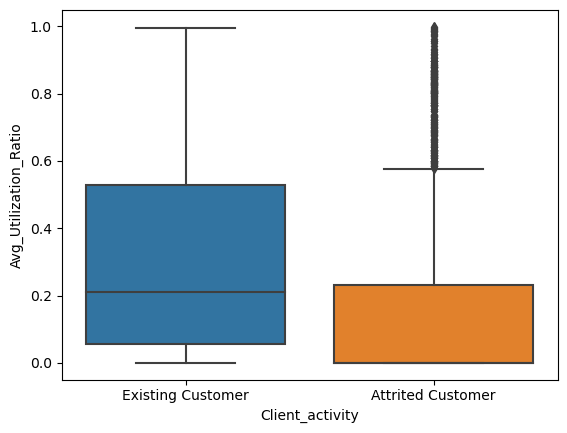

In [344]:
sns.boxplot(x="Client_activity", y="Avg_Utilization_Ratio", data=new_data)
new_data.groupby('Client_activity')['Avg_Utilization_Ratio'].describe()

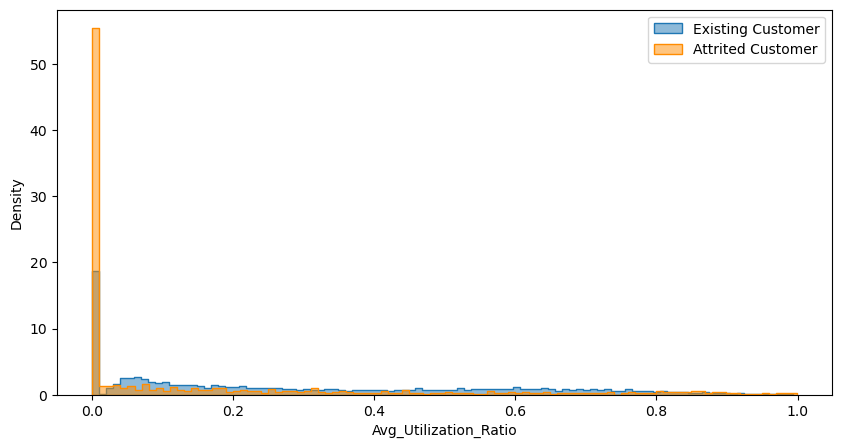

In [345]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_ec, x='Avg_Utilization_Ratio', element="step", stat="density", alpha=0.5, bins=100)
sns.histplot(data=nd_ac, x='Avg_Utilization_Ratio', color='darkorange', element="step", stat="density", alpha=0.5, bins=100)
plt.legend(['Existing Customer','Attrited Customer'])

In [346]:
# очистим данные от клиентов, которые не использовали кредитные карты
avg = new_data.query('Avg_Utilization_Ratio > 0')

,count,mean,std,min,25%,50%,75%,max
Client_activity,,,,,,,,
Attrited Customer,734.0,0.360146,0.289576,0.004,0.110,0.278,0.59875,0.999
Existing Customer,6923.0,0.363932,0.258153,0.016,0.125,0.311,0.58700,0.994


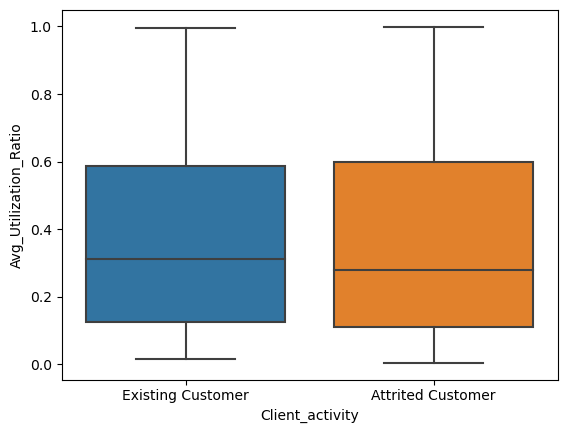

In [347]:
sns.boxplot(x="Client_activity", y="Avg_Utilization_Ratio", data=avg)
avg.groupby('Client_activity')['Avg_Utilization_Ratio'].describe()

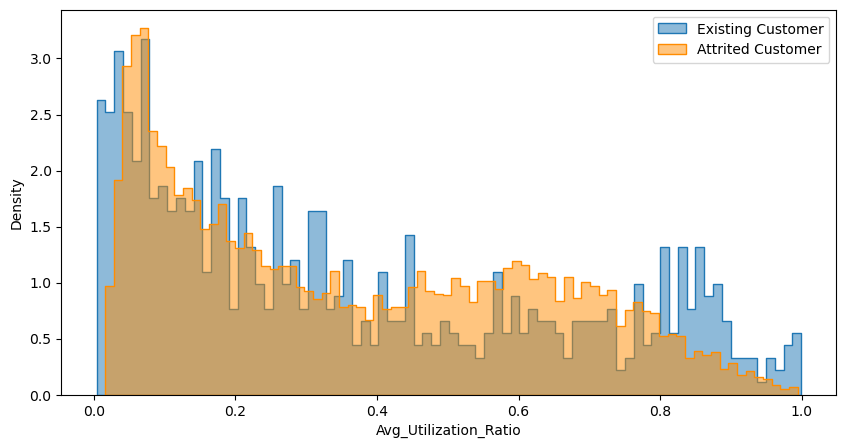

In [348]:
# с целью построения нормализованной гистограммы разобьем данные на 2 выборки
nd_ac2 = avg.where(avg['Client_activity'] =='Attrited Customer')
nd_eс2 = avg.where(avg['Client_activity'] =='Existing Customer')

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=nd_ac2, x='Avg_Utilization_Ratio', element="step", stat="density", alpha=0.5, bins=80)
sns.histplot(data=nd_eс2, x='Avg_Utilization_Ratio', color='darkorange', element="step", stat="density", alpha=0.5, bins=80)
plt.legend(['Existing Customer','Attrited Customer'])

In [349]:
x = avg[avg['Client_activity'] =='Attrited Customer']['Avg_Utilization_Ratio']
y = avg[avg['Client_activity'] =='Existing Customer']['Avg_Utilization_Ratio']

In [350]:
scipy.stats.shapiro(x) #гипотеза о нормальности распределения для ушедших клиентов отклонена

ShapiroResult(statistic=0.9012954831123352, pvalue=2.4396801574843993e-21)

In [351]:
y = random.sample(list(y), 4500)
scipy.stats.shapiro(y) #гипотеза о нормальности распределения для оставшихся клиентов отклонена

ShapiroResult(statistic=0.9251134991645813, pvalue=1.0355595651360398e-42)

In [352]:
# для нулевого коэффициента
avg0 = new_data.groupby('Client_activity')['Avg_Utilization_Ratio'].value_counts(normalize=True)
avg0['Attrited Customer'][0]*100

54.88629379225568

In [353]:
avg0['Existing Customer'][0]*100

18.55294117647059

# Наиболее влияющие факторы

In [354]:
# коэффициенты корреляции Пирсона по измененному датафрейм относительно характеристики Client_activity 
corr_new_data2 = new_data2.corr().sort_values(by='Client_activity')
corr_new_data2['Client_activity']

Transaction_Count              -0.371403
Change_in_Transaction_Count    -0.290054
Revolving_Balance              -0.263053
Avg_Utilization_Ratio          -0.178410
Transaction_Amount             -0.168598
Qty_of_products                -0.150005
Change_in_Transaction_Amount   -0.131063
CLIENT                         -0.046430
Credit_Limit                   -0.023873
Card_Category                  -0.003687
Buy_Credit_Line                -0.000285
Income_Category                 0.010414
Months_on_book                  0.013687
Marital_Status                  0.016605
Customer_Age                    0.018203
Dependent_count                 0.018991
Education_Level                 0.025966
Gender                          0.037272
Inactive_months                 0.152449
Qty_of_contacts                 0.204491
Client_activity                 1.000000
Name: Client_activity, dtype: float64

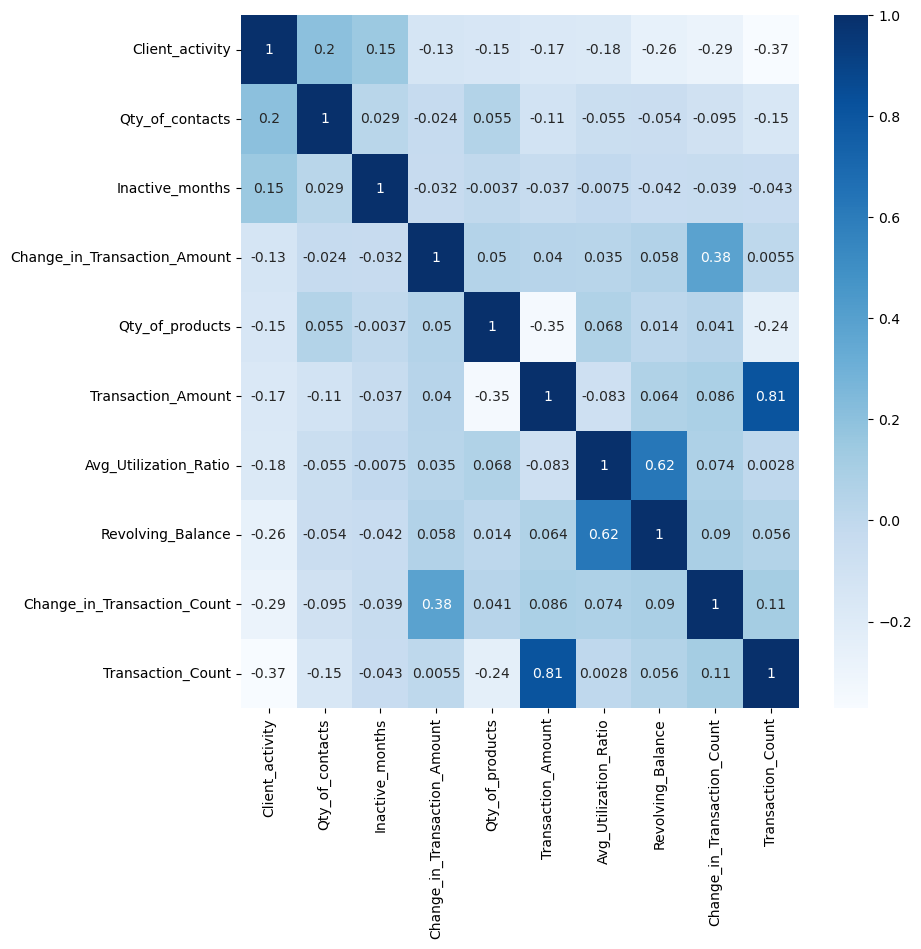

In [355]:
# посмотрим на тепловую матрицу с наиболее влияющими характеристиками
plt.subplots(figsize = (9,9))
cols = ['Client_activity', 'Qty_of_contacts', 'Inactive_months', 'Change_in_Transaction_Amount', 'Qty_of_products', 'Transaction_Amount', 'Avg_Utilization_Ratio', 'Revolving_Balance', 'Change_in_Transaction_Count', 'Transaction_Count']
hm = sns.heatmap(new_data2[cols].corr(), cbar=True, annot=True,  cmap= 'Blues')

In [356]:
cols = ['Client_activity', 'Qty_of_contacts', 'Inactive_months', 'Change_in_Transaction_Amount', 'Qty_of_products', 'Avg_Utilization_Ratio', 'Revolving_Balance', 'Change_in_Transaction_Count', 'Transaction_Count']

# Логистическая регрессия

In [357]:
# подготовленный набор данных для прогноза
new_data2[cols]

,Client_activity,Qty_of_contacts,Inactive_months,Change_in_Transaction_Amount,Qty_of_products,Avg_Utilization_Ratio,Revolving_Balance,Change_in_Transaction_Count,Transaction_Count
0,0,3,1,1.335,5,0.061,777,1.625,42
1,0,2,1,1.541,6,0.105,864,3.714,33
2,0,0,1,2.594,4,0.000,0,2.333,20
3,0,1,4,1.405,3,0.760,2517,2.333,20
4,0,0,1,2.175,5,0.000,0,2.500,28
...,...,...,...,...,...,...,...,...,...
10122,0,3,2,0.703,3,0.462,1851,0.857,117
10123,1,3,2,0.804,4,0.511,2186,0.683,69
10124,1,4,3,0.819,5,0.000,0,0.818,60
10125,1,3,3,0.535,4,0.000,0,0.722,62


In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = new_data2[cols].drop('Client_activity', axis=1) #признаки, на основании которых строится прогноз
y = new_data2['Client_activity'] #прогнозируемая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #разбивает данные на обучающую и тестовую выборки

In [359]:
# обучение модели
model = LogisticRegression(max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [360]:
# прогноз активности клиентов на основании тестовых значений признаков
predict_y = model.predict(X_test) 
predict_y = pd.DataFrame(predict_y, columns=['predict_y'])

In [361]:
# объединим прогноз и Активность клиента из тестовой выборки
y_test1 = pd.DataFrame(y_test)
y_test1['predict_y'] = list(predict_y['predict_y'])
y_test1['mistake'] = y_test1['predict_y'] - y_test1['Client_activity']
y_test1[y_test1['mistake'] !=0]

,Client_activity,predict_y,mistake
6469,1,0,-1
771,0,1,1
9688,1,0,-1
1342,0,1,1
4133,1,0,-1
...,...,...,...
4420,1,0,-1
4838,1,0,-1
5371,1,0,-1
2214,0,1,1


In [362]:
# ROC-кривая и ROC AUC
from sklearn.metrics import roc_auc_score
p_test = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, p_test)

0.8906083915079434

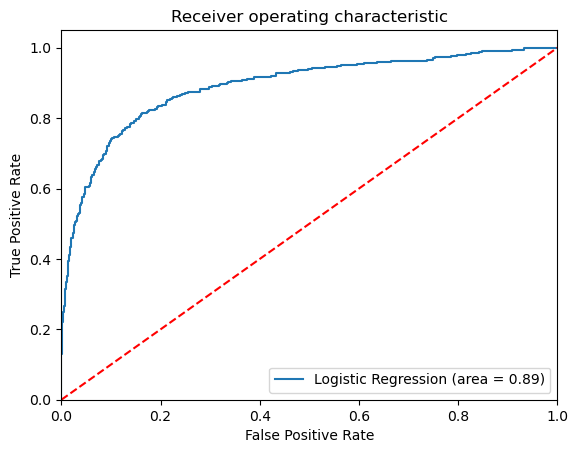

In [363]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, p_test)
fpr, tpr, thresholds = roc_curve(y_test, p_test)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [369]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, predict_y)

0.8948667324777887

In [370]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1698
           1       0.75      0.52      0.62       328

    accuracy                           0.89      2026
   macro avg       0.83      0.74      0.78      2026
weighted avg       0.89      0.89      0.89      2026



In [371]:
# матрица ошибок
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predict_y)).T

,0,1
0,1642,157
1,56,171


In [368]:
y_train.count()

8101

Модель обладает достаточной предсказательной силой.